In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
cautions = pd.read_csv('../data/cleaned_season_data.csv')
cautions

,Unnamed: 0,Unnamed: 0.1,RaceNumber,Date,Track,Cars,Winner,WinnerStart,WinnerMake,TrackLength,...,MilesRun,Purse,PoleSpeed,NumCautions,LapsUnderCaution,AvgSpeed,LeadChanges,Year,StageAdjustCautions,TrackType
0,0,0,1,2000-02-20,Daytona,43,Dale Jarrett,1,Ford,2.500,...,500,7646975.0,191.091,6,24,155.669,9,2000,6,Superspeedway
1,1,1,2,2000-02-27,Rockingham,43,Bobby Labonte,3,Pontiac,1.017,...,400,1744304.0,158.035,4,22,127.875,22,2000,4,Intermediate
2,2,2,3,2000-03-05,Las Vegas,43,Jeff Burton,11,Ford,1.500,...,222,3572500.0,172.563,2,29,119.982,13,2000,2,Intermediate
3,3,3,4,2000-03-12,Atlanta,43,Dale Earnhardt,35,Chevrolet,1.540,...,501,1792435.0,192.574,10,62,131.759,30,2000,10,Intermediate
4,4,4,5,2000-03-19,Darlington,43,Ward Burton,3,Pontiac,1.366,...,400,1792036.0,172.662,5,30,128.076,13,2000,5,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,736,18,19,2020-07-23,Kansas,40,Denny Hamlin,10,Toyota,1.500,...,401,NaN,NaN,11,47,121.835,21,2020,9,Intermediate
737,737,19,20,2020-08-02,Loudon,38,Brad Keselowski,4,Ford,1.058,...,318,NaN,NaN,11,52,100.372,22,2020,9,Intermediate
738,738,20,21,2020-08-08,Michigan,39,Kevin Harvick,3,Ford,2.000,...,322,NaN,NaN,9,43,124.712,12,2020,7,Intermediate
739,739,21,22,2020-08-09,Michigan,39,Kevin Harvick,20,Ford,2.000,...,312,NaN,NaN,5,24,144.463,10,2020,3,Intermediate


In [4]:
# first basic summary
cautions['StageAdjustCautions'].describe()

count    741.000000
mean       7.730094
std        3.495947
min        0.000000
25%        5.000000
50%        7.000000
75%       10.000000
max       22.000000
Name: StageAdjustCautions, dtype: float64

In [5]:
cautions['TrackType']

0      Superspeedway
1       Intermediate
2       Intermediate
3       Intermediate
4       Intermediate
           ...      
736     Intermediate
737     Intermediate
738     Intermediate
739     Intermediate
740             Road
Name: TrackType, Length: 741, dtype: object

(array([ 30.,  88., 172., 185., 129.,  85.,  30.,  12.,   7.,   3.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

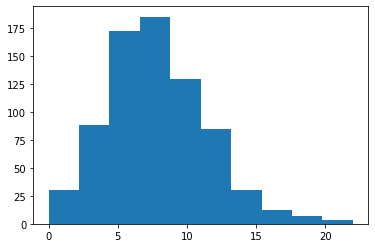

In [6]:
plt.hist(cautions['StageAdjustCautions'])

In [7]:
cautions.groupby('TrackType')['StageAdjustCautions'].mean()

TrackType
Intermediate      7.412993
Road              5.209302
Short            10.950820
Superspeedway     6.710345
Name: StageAdjustCautions, dtype: float64

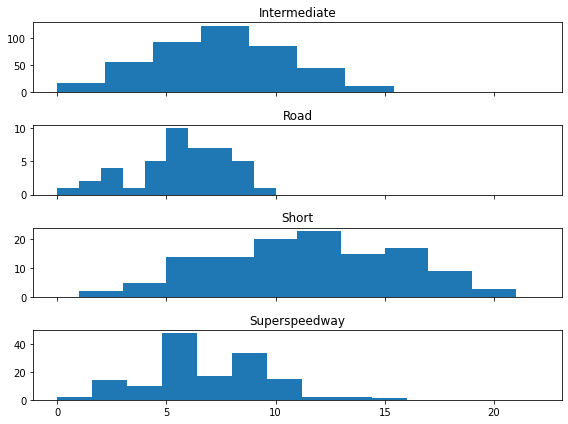

In [8]:
g = cautions.groupby('TrackType')

fix, axes = plt.subplots(g.ngroups, sharex=True, figsize=(8, 6))
for i, (track_type, d) in enumerate(g):
    axes[i].hist(d['StageAdjustCautions'])
    axes[i].set_title(track_type)
plt.tight_layout()

In [9]:
races_with_cautions = cautions[cautions['StageAdjustCautions'] > 0]
miles_per_caution = races_with_cautions['MilesRun'] / races_with_cautions['StageAdjustCautions']
miles_per_caution.describe()

count    737.000000
mean      64.461593
std       45.104806
min       12.666667
25%       39.076923
50%       54.600000
75%       80.000000
max      401.000000
dtype: float64

Questions I want to answer:
- How many cautions can I expect during a race?
- Is the number of cautions different per track type?
- Has the number of cautions per race changed over the time period?

Things I still need to do:
- Replace MilesRun with actual scheduled miles

In [12]:
cautions['Year'] = pd.to_datetime(cautions['Date'], format='%Y-%m-%d').dt.year
cautions['Year']

0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
736    2020
737    2020
738    2020
739    2020
740    2020
Name: Year, Length: 741, dtype: int64

In [14]:
cautions[['Year', 'StageAdjustCautions']].groupby('Year').describe()

StageAdjustCautions                                                   
                   count       mean       std  min   25%   50%    75%   max
Year                                                                       
2000                34.0   7.176471  3.424250  2.0  5.00   7.0   9.00  17.0
2001                36.0   7.388889  3.643215  0.0  5.00   7.0  10.00  16.0
2002                36.0   7.472222  3.699314  0.0  5.00   7.0   9.25  15.0
2003                36.0   8.750000  3.767341  2.0  6.00   8.0  10.00  20.0
2004                36.0   8.694444  3.031449  3.0  6.00   9.0  11.00  17.0
2005                36.0  10.361111  3.689001  4.0  8.00  10.0  11.25  22.0
2006                36.0   9.611111  3.082464  6.0  7.00   9.0  11.00  18.0
2007                36.0   9.527778  3.605441  4.0  7.00   9.0  12.00  21.0
2008                36.0   8.916667  2.729469  4.0  7.00   8.0  10.25  18.0
2009                36.0   8.472222  3.401564  3.0  6.00   8.0  10.25  17.0
2010                36.0   7.361111  2.695528  3.0  5.00   7.0   9.00  15.0
2011                36.0   7.722222  3.566600  3.0  5.00   6.0   9.25  18.0
2012                36.0   6.000000  2.947154  1.0  4.00   5.0   8.00  14.0
2013                36.0   7.972222  3.139482  3.0  5.75   8.0   9.25  17.0
2014                36.0   8.416667  2.979693  4.0  6.00   8.0   9.25  15.0
2015                36.0   8.277778  3.394206  2.0  6.75   8.0   9.00  18.0
2016                36.0   7.472222  2.942167  3.0  5.75   7.0   9.00  16.0
2017                36.0   6.166667  3.166792  1.0  4.00   6.0   7.00  13.0
2018                36.0   4.833333  2.501428  1.0  3.00   4.5   6.00  11.0
2019                36.0   4.861111  2.929191  0.0  3.00   5.0   7.00  13.0
2020                23.0   6.347826  3.039269  1.0  4.50   6.0   8.00  15.0

<AxesSubplot:xlabel='Year'>

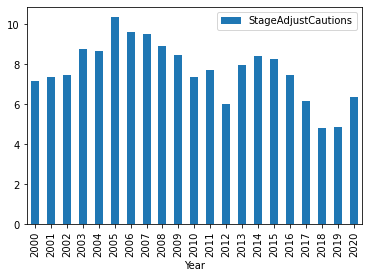

In [16]:
mean_by_year = cautions[['Year', 'StageAdjustCautions']].groupby('Year').mean()
mean_by_year.plot.bar()